In [80]:
import matplotlib.pyplot as plt
import json

In [10]:
%load_ext autoreload
%autoreload 2

In [2]:
dataset = "mnist"
nn_type = "mlp"

In [6]:
cfg_filename = f"configs/{nn_type}/config-{dataset}.json"

with open(cfg_filename) as cfg_file:
    cfg = json.load(cfg_file)

In [7]:
cfg["RGRAPH"]["SAVE_GRAPH"] = True

In [8]:
param_grid = {
    "sparsities" : [0.3, 0.7], 
    "rewiring_probabilities" : [0.128],
    "random_seeds" : [4]
}

In [9]:
from src import explore

In [11]:
explore.run_on_param_grid(cfg, param_grid, log = True)

Train
loss : 0.2223138530085336
top1_err : 6.463774867149304
top5_err : 0.5869091955075132
---

Test
top1_err : 2.670094936708861
top5_err : 0.06922468354430379
---

Train
loss : 0.08224041682125917
top1_err : 2.500888406594933
top5_err : 0.04997334754797441
---

Test
top1_err : 2.1064082278481013
top5_err : 0.06922468354430379
---

Train
loss : 0.056720824211216304
top1_err : 1.755730277185501
top5_err : 0.029984008528784648
---

Test
top1_err : 2.0272943037974684
top5_err : 0.04944620253164557
---

Train
loss : 0.036017885778162846
top1_err : 1.1082977882580463
top5_err : 0.014992004264392324
---

Test
top1_err : 1.7207278481012658
top5_err : 0.03955696202531646
---

Train
loss : 0.02492116068327017
top1_err : 0.7307213887985327
top5_err : 0.009994669509594883
---

Test
top1_err : 1.5723892405063291
top5_err : 0.009889240506329115
---

Train
loss : 0.016237158221063582
top1_err : 0.45642324093816633
top5_err : 0.0049973347547974415
---

Test
top1_err : 1.5031645569620253
top5_err : 0

In [12]:
from utils import graph_utils

In [ ]:
gsparsity={rgraph['SPARSITY']}_p={rgraph['P']}_gseed={rgraph['SEED_GRAPH']}.npz

In [22]:
for sparsity in param_grid["sparsities"]:
    for p in param_grid["rewiring_probabilities"]:
        for seed in param_grid["random_seeds"]:
            out_dir = f"{cfg['OUT_DIR']}/{cfg['MODEL']['TYPE']}/{cfg['TRAIN']['DATASET']}/graphs"
            graph = graph_utils.load_graph(f"{out_dir}/gsparsity={sparsity}_p={p}_gseed={seed}.npz")
            print(graph_utils.get_graph_stats(graph))

{'clustering_coefficient': 0.5769675474765059, 'average_path_length': 1.7877450980392158}
{'clustering_coefficient': 0.7212951609684624, 'average_path_length': 1.2980392156862746}


In [81]:
from utils import log_parser

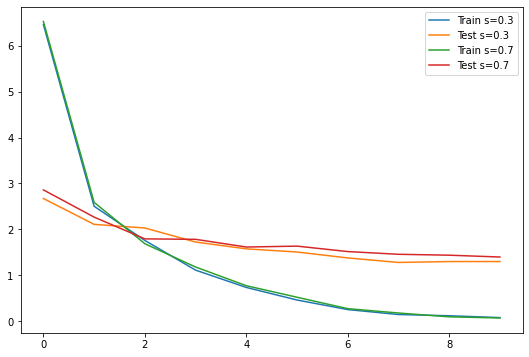

In [82]:
plt.figure(figsize = (9, 6))

for sparsity in param_grid["sparsities"]:
    for p in param_grid["rewiring_probabilities"]:
        for seed in param_grid["random_seeds"]:
            out_dir = f"{cfg['OUT_DIR']}/{cfg['MODEL']['TYPE']}/{cfg['TRAIN']['DATASET']}/logs"
            train_stats, test_stats = log_parser.parse_log(f"{out_dir}/log_gsparsity={sparsity}_p={p}_gseed={seed}.txt")
            
            plt.plot(train_stats[:, 1], label = f"Train s={sparsity}")
            plt.plot(test_stats[:, 0], label = f"Test s={sparsity}")
            
plt.legend()